In [160]:
# Import our dependencies
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [161]:

url = 'https://raw.githubusercontent.com/rbitas/Stroke-Prediction/main/Data/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(url)

In [162]:
# Generate our categorical variable lists
df_cat = df.dtypes[df.dtypes == "object"].index.tolist()

In [163]:
# Check the number of unique values in each column
df[df_cat].nunique()

gender            3
ever_married      2
work_type         5
Residence_type    2
smoking_status    4
dtype: int64

In [164]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df[df_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(df_cat)
encode_df.head()

/Users/samfish/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [165]:
# Merge one-hot encoded features and drop the originals
df = df.merge(encode_df,left_index=True, right_index=True)
df = df.drop(df_cat,1)
df.head()

/var/folders/qd/tgy2vwzn13v87dn9nbtdq9180000gn/T/ipykernel_85713/634944062.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(df_cat,1)


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,51676,61.0,0,0,202.21,NaN,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31112,80.0,0,1,105.92,32.5,1,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,60182,49.0,0,0,171.23,34.4,1,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1665,79.0,1,0,174.12,24.0,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [166]:
df = df.drop(columns=['id'])

In [167]:
df.dtypes

age                               float64
hypertension                        int64
heart_disease                       int64
avg_glucose_level                 float64
bmi                               float64
stroke                              int64
gender_Female                     float64
gender_Male                       float64
gender_Other                      float64
ever_married_No                   float64
ever_married_Yes                  float64
work_type_Govt_job                float64
work_type_Never_worked            float64
work_type_Private                 float64
work_type_Self-employed           float64
work_type_children                float64
Residence_type_Rural              float64
Residence_type_Urban              float64
smoking_status_Unknown            float64
smoking_status_formerly smoked    float64
smoking_status_never smoked       float64
smoking_status_smokes             float64
dtype: object

In [168]:
# Min bmi = 103, max bmi = 97.6 and average of the two the two equals 53.95
df['bmi'] = df['bmi'].fillna(53.95)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.60,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,61.0,0,0,202.21,53.95,1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,80.0,0,1,105.92,32.50,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,49.0,0,0,171.23,34.40,1,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,79.0,1,0,174.12,24.00,1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [169]:
# Remove stroke dtarget from features data
y = df.stroke.values
X = df.drop(columns="stroke").values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [170]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_train, y_train.ravel())

In [171]:
# Preprocess numerical data for neural network

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_resampled)
X_test_scaled = X_scaler.transform(X_test)

In [172]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500)

In [173]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_resampled)

In [174]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [176]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [177]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1202,14
Actual 1,60,2


Accuracy Score : 0.9420970266040689
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1216
           1       0.12      0.03      0.05        62

    accuracy                           0.94      1278
   macro avg       0.54      0.51      0.51      1278
weighted avg       0.91      0.94      0.93      1278



In [178]:
# CHECK WITH INSTRUCTOR TO MAKE SURE "df.columsn" is working properly vs. "X.columns" which is what we did in the example in class!!

# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_

# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, df.columns), reverse=True)

[(0.3547627037837198, 'age'),
 (0.18766496865797133, 'avg_glucose_level'),
 (0.1831603748104467, 'bmi'),
 (0.03074167215848109, 'hypertension'),
 (0.024124990267670187, 'ever_married_No'),
 (0.022915327073018167, 'gender_Other'),
 (0.02246381046372015, 'heart_disease'),
 (0.01924949403606057, 'smoking_status_formerly smoked'),
 (0.016130399241314635, 'work_type_Never_worked'),
 (0.01605500601041161, 'work_type_Private'),
 (0.015465250728273443, 'smoking_status_Unknown'),
 (0.015135087888036657, 'gender_Female'),
 (0.014761015894550566, 'Residence_type_Rural'),
 (0.014548847741626113, 'work_type_children'),
 (0.014362689651315921, 'stroke'),
 (0.01379793005289135, 'smoking_status_never smoked'),
 (0.013249667547518853, 'Residence_type_Urban'),
 (0.012418236544032218, 'ever_married_Yes'),
 (0.008880127582475307, 'work_type_Self-employed'),
 (0.00011239986646526655, 'work_type_Govt_job'),
 (0.0, 'gender_Male')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

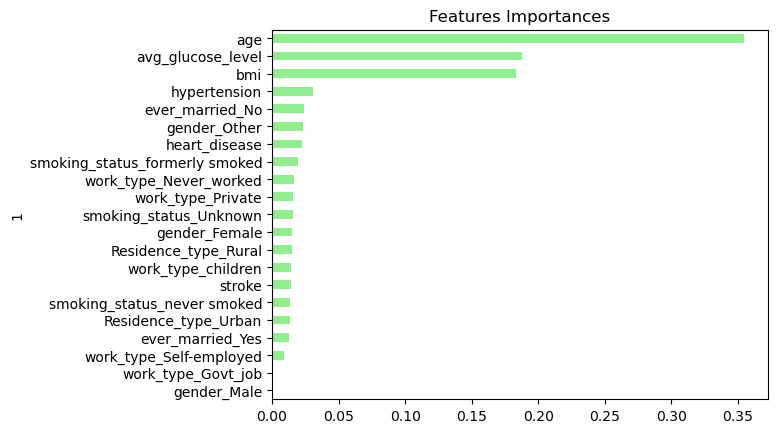

In [179]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, df.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)